# Data Resources
We get stock prices of Lo'real Group from YahooFinance via a Python library called: yfinance.

After getting the data, save it to a csv for further analysis.

In [22]:
# -*- coding: utf-8 -*-
# imporrt libraries

import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mplfinance as mpf

In [3]:
# Get data on L'Oreal from Yahoo Finance for 5 years
loreal = yf.Ticker("OR.PA")
df = loreal.history(period="5y")

In [21]:
# Export raw data to csv
path = '../Data/loreal_stock_price.csv'
df.to_csv(path)

# Central Tendency Measures Calculation

Here we pay attention to daily close price of stock. Find out the mean, mode, median measures of the stock close price per year for the 5 closest years.



In [5]:
df['Close'].describe()
mean_close_price = df['Close'].mean()
med_close_price = df['Close'].median()

In [26]:
# Resample the data to monthly
stock_price_by_month = df.resample('M').agg({'Open': 'first', 
                                       'High': 'max', 
                                       'Low': 'min', 
                                       'Close': 'last', 
                                       'Volume': 'sum'})

# Prepare the data for mplfinance
stock_price_by_month.index = pd.to_datetime(stock_price_by_month.index)

In [29]:
descriptive_stats = df.groupby(df.index.year)['Close'].mean()
descriptive_stats = descriptive_stats.to_frame()
descriptive_stats.columns = ['Mean Close Price']
descriptive_stats['Median Close Price'] = df.groupby(df.index.year)['Close'].median()
descriptive_stats['Mode Close Price'] = df.groupby(df.index.year)['Close'].agg(lambda x: x.value_counts().index[0])
descriptive_stats['Standard Deviation Close Price'] = df.groupby(df.index.year)['Close'].std()
descriptive_stats['Variance Close Price'] = df.groupby(df.index.year)['Close'].var()
descriptive_stats['Skewness Close Price'] = df.groupby(df.index.year)['Close'].skew()
descriptive_stats

,Mean Close Price,Median,Mode
Date,,,
2019,237.988906,238.408173,236.013962
2020,253.369123,257.496002,267.851807
2021,343.242288,351.582718,288.096954
2022,329.318243,328.974609,335.251984
2023,395.210088,398.274811,392.168762
2024,416.691810,420.040100,436.500000


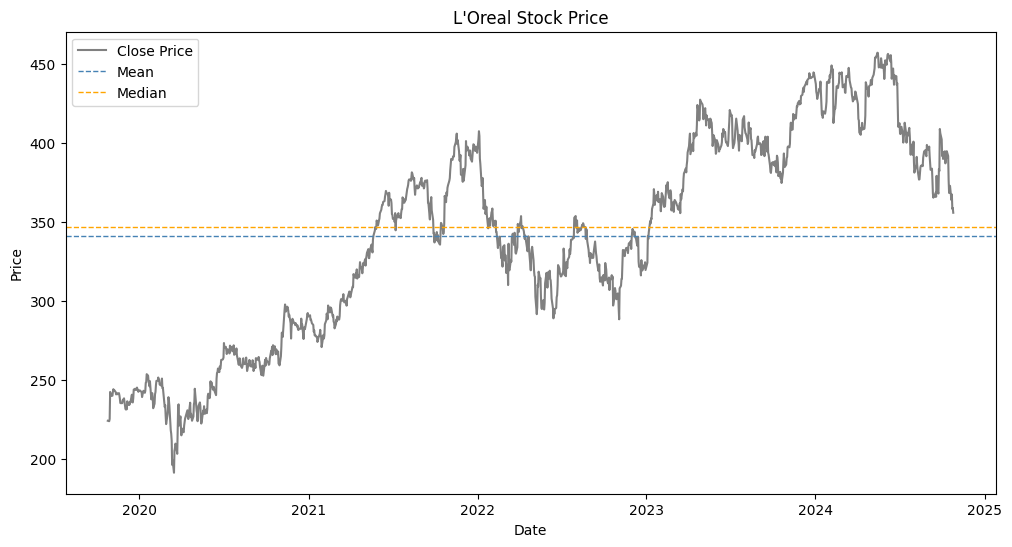

In [20]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='grey')
plt.axhline(y=mean_close_price, color='steelblue', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=med_close_price, color='orange', linestyle='--', linewidth=1, label='Median')
plt.title('L\'Oreal Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


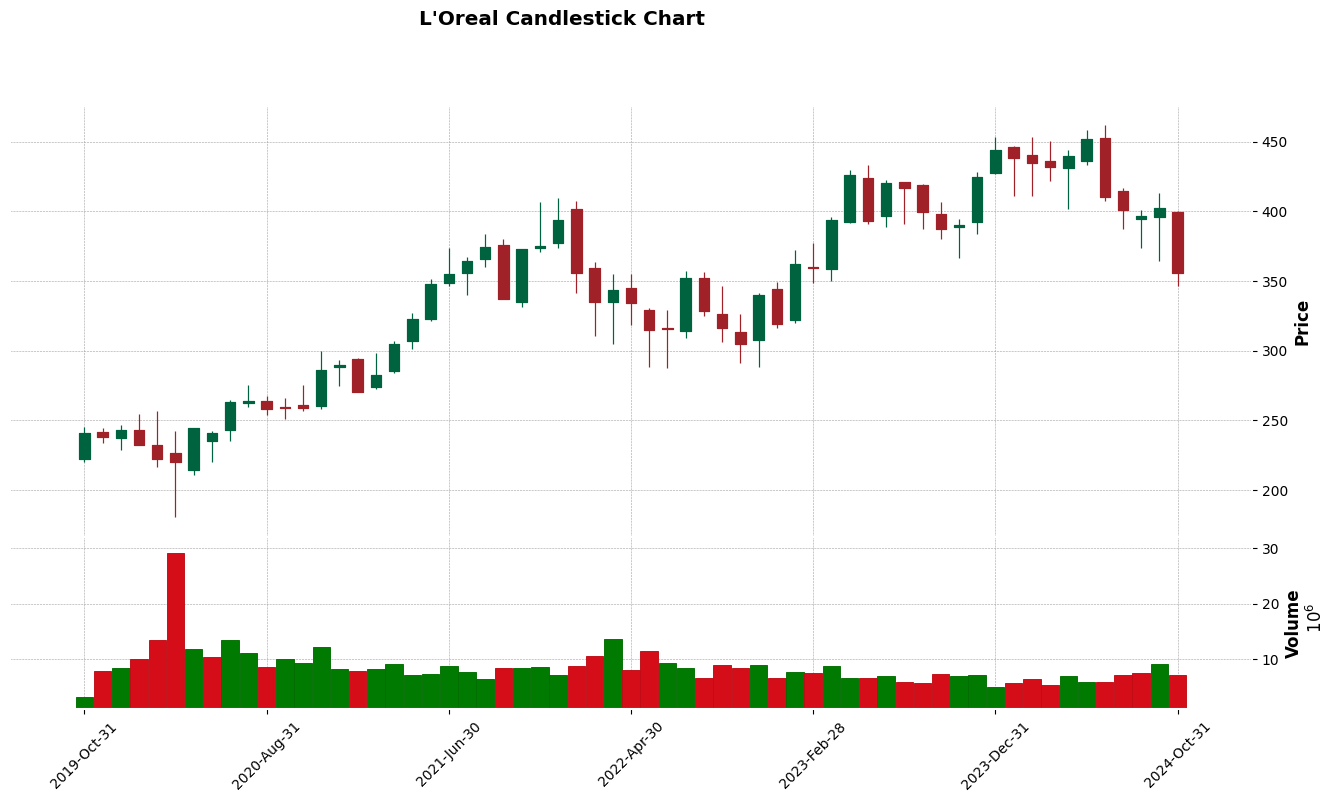

In [28]:
mpf.plot(stock_price_by_month, type='candle', volume=True, title='L\'Oreal Candlestick Chart', ylabel='Price', ylabel_lower='Volume', style='charles', figratio=(12, 6), figscale=1.5)

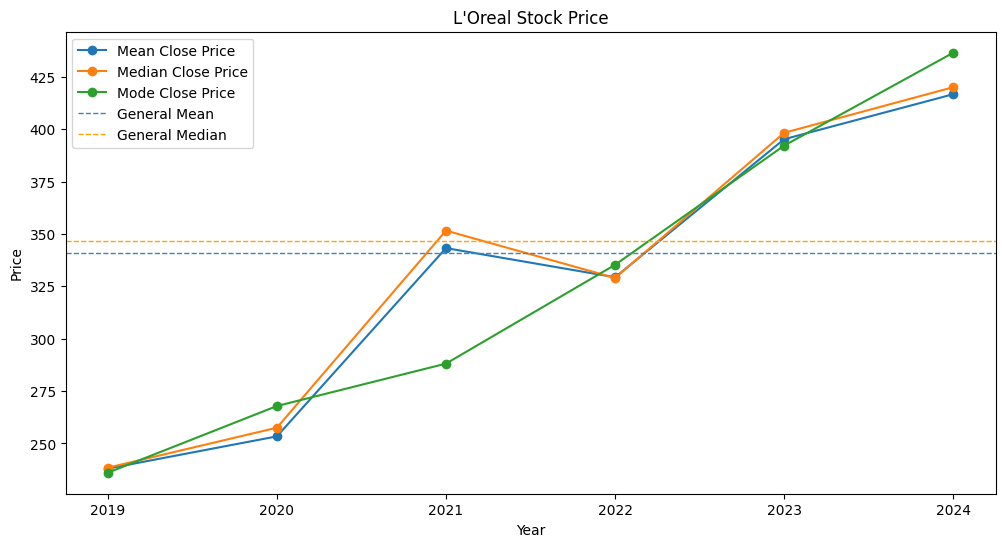

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(descriptive_stats.index, descriptive_stats['Average Close Price'], label='Mean Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Median'], label='Median Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Mode'], label='Mode Close Price', marker='o')
plt.axhline(y=mean_close_price, color='steelblue', linestyle='--', linewidth=1, label='General Mean')
plt.axhline(y=med_close_price, color='orange', linestyle='--', linewidth=1, label='General Median')
plt.title('L\'Oreal Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


# Dispersion Measures Calculation
This part uses dispersion measures to explore further the variation of the stock prices of L'Oreal.

In [21]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1285.000000,1285.000000,1285.000000,1285.000000,1.285000e+03,1285.000000,1285.0
mean,340.884445,344.175249,337.530534,341.006371,4.038294e+05,0.024319,0.0
std,64.679599,64.795566,64.531361,64.576396,2.241694e+05,0.362432,0.0
min,188.958502,196.049060,180.486693,191.168564,0.000000e+00,0.000000,0.0
25%,288.843350,290.895817,286.044474,288.226593,2.736600e+05,0.000000,0.0
50%,346.829526,350.780370,343.228593,346.626892,3.535940e+05,0.000000,0.0
75%,394.926327,398.681568,391.739214,394.722321,4.611330e+05,0.000000,0.0
max,457.950012,461.850006,456.149994,456.899994,2.569157e+06,6.600000,0.0
